# Bollywood Movie Analysis

# Meta-Data of the Bollywood Dataset:

SINo - Identifier for the movies.
Release Date - Date on which the movie was released.
MovieName - Name of the movie.
ReleaseTime - Mentions special time of release. LW (Long weekend), FS (Festive Season), HS (Holiday Season), N (Normal).
Genre – Genre of the film such as Romance, Thriller, Action, Comedy, etc
Budget – Movie creation budget
BoxOfficeCollection – Box office collection
YoutubeViews – Number of views of the YouTube trailers
YoutubeLikes – Number of likes of the YouTube trailers
YoutubeDislikes – Number of dislikes of the YouTube trailers

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Next, we read the csv file into a Pandas dataframe using the function read_csv() from the Pandas library.

In [2]:
# reading the dataset
df = pd.read_csv(r"C:\Users\User\Downloads\bollywood.csv")

After reading the dataset, we view the first few rows of the dataframe using the head() function from the Pandas library.

In [3]:
# viewing the first few rows of the dataset
# the head() function displays the first 5 rows of the dataframe
df.head()

,SlNo,ReleaseDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,TableNo.21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,AmitSahniKiList,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,RajdhaniExpress,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,BobbyJasoos,N,Comedy,18,10.80,3113427,4512,1224


Now, we start answering the lab questions.

## Q1. How many records are present in the dataset?
To solve Question 1, we use the shape attribute of a Pandas dataframe and check the number of rows by using index 0.

In [4]:
# 1. number of records in the dataset
df.shape[0]

149

As we can see, there are 149 records in the dataset.

## Q2. How many movies were released in each Release Time? Sort number of releases in Release Time in descending order.
To solve Question 2, we use the function value_counts() from the Pandas library on the ReleaseTime column. The function automatically sorts the counts in descending order.

In [5]:
# 2. finding the number of movies by release time sorted in the descending order
df.ReleaseTime.value_counts()

N     99
HS    18
FS    17
LW    15
Name: ReleaseTime, dtype: int64

As we can see, the highest number of movies were released on a normal time, followed by the holiday season, the festive season, and then the long weekend having the lowest number of releases.

## Q3. Which genre had highest number of releases during the Festive Season?
To solve Question 3, we use the strip() function on the string values of the Genre column to remove the leading and trailing spaces. Then, we filter the dataframe using the condition where ReleaseTime is equal to FS and use the value_counts() method on the Genre column to get the number of movies grouped by Genre.

In [6]:
# formatting the genre column
df.Genre = df.Genre.str.strip()

# 3. finding the genre with the highest number of releases during the festive season
df[df.ReleaseTime=='FS'].Genre.value_counts()

Drama       4
Thriller    4
Action      3
Romance     3
Comedy      3
Name: Genre, dtype: int64

As we can see, the genres Thriller and Drama had the highest number of releases during the Festive Season, having 4 released each.

## Q4. How many movies in each genre got released in different release times like long weekend, festive season, etc.
To solve Question 4, we use the crosstab() function from the Pandas library on the Genre and ReleaseTime columns of the dataframe.

In [9]:
# 4. cross tab between Genre and ReleaseTime
pd.crosstab(df.Genre, df.ReleaseTime)

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


## Q5. In which year were maximum number movie released?
To solve Question 5, we first convert the data type of the Release Date column to datetime using the to_datetime() function from the Pandas library. After that, we generate a new column Year by extracting the year attribute from the Release Date column. Following that, we use the value_counts() function from the Pandas library to get the number of movies released for every value of year.

In [10]:
# 5. finding the year when the maximum number of movies were released

# converting Release Date into datetime data type
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])

# generating a year column to extract the date from the column Release Date
df['Year'] = df['ReleaseDate'].dt.year

# finding the year when the maximum number of movies were released
df.Year.value_counts()

2014    70
2013    67
2015    12
Name: Year, dtype: int64

As we can see, the maximum number of movies were released in the year 2014.

## Q6. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 30 crore or more?
To solve Question 6, we filter the dataframe using the condition that the Budget is >= 30 crores and then extract the month from the Release Date column using the month attribute. After that, we use the value_counts() function from the Pandas library on the month extracted to get the number of movies released for every value of the month.

In [11]:
# 6. finding the month which sees maximum number of high budget movies
df[df.Budget>=30]['ReleaseDate'].dt.month.value_counts()

2     8
8     7
1     6
11    6
6     5
7     5
9     4
10    4
4     3
3     3
5     3
12    2
Name: ReleaseDate, dtype: int64

As we can see, the month 2 - February typically sees most releases of high budgeted movies.

## Q7. Which are the top 10 flop movies with minimum return on investment (ROI)?
To solve Question 7, we first generate a new column in the dataframe called ROI using the formula (BoxOfficeCollection – Budget) / Budget. Then we sort the dataframe in the ascending order by the column ROI and display the top 10 columns using splicing.

In [12]:
# 7. finding the top 10 flop movies with minimum ROI

# creating the ROI column
df['ROI'] = (df.BoxOfficeCollection - df.Budget)/df.Budget

# sorting the values and displaying the top 10 flop movies
df.sort_values(by='ROI').MovieName[0:10]

9              Gangoobai
15               Bandook
53               SonaSpa
3        RajdhaniExpress
49     KyaDilliKyaLahore
121               Satya2
67           PuraniJeans
103         SamratandCo.
30             Heartless
102              Kaanchi
Name: MovieName, dtype: object

As we can see, the movies Gangoobai, Bandook, Sona Spa, Rajdhani Express, Kya Dilli Kya Lahore, Satya 2, Purani Jeans, Samrat and Co., Heartless, and Kaanchi have the minimum ROI and are the top 10 flop movies.

## Q8. Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times.

To solve Question 8, we group the dataframe by the Release Date column using the groupby() function from the Pandas library and then calculate mean of the groups using the mean() function from the Pandas library on the ROI column of the grouped dataset.

In [13]:
# 8. calculating average ROI based on ReleaseTime
df.groupby(by='ReleaseTime').ROI.mean()

ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64

As we can see, movies which release on the long weekend and festive seasons have higher values of ROI - 1.12 and 0.97 respectively.

## Q9. Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?
To solve Question 9, we use the corr() function from the Pandas library on the BoxOfficeCollection and YoutubeLikes columns of the dataframe.

In [14]:
# 9. correlation between BoxOfficeCollection and YoutubeLikes
corr = df[['BoxOfficeCollection', 'YoutubeLikes']].corr()
corr

,BoxOfficeCollection,YoutubeLikes
BoxOfficeCollection,1.000000,0.682517
YoutubeLikes,0.682517,1.000000


As we can see, the columns BoxOfficeCollection and YoutubeLikes have a moderate degree of positive linear correlation, having correlation coefficient 0.68. This means that if BoxOfficeCollection increases by 100%, the YoutubeLikes also increase by 68%.

## Q10. Which genre of movies typically sees more YouTube views? Draw boxplots for each genre of movies to compare.
To solve Question 10, we use the boxplot() function from the Seaborn library and pass the values Genre to be plotted on the x-axis and YoutubeViews to be plotted on the y-axis.

<Axes: xlabel='Genre', ylabel='YoutubeViews'>

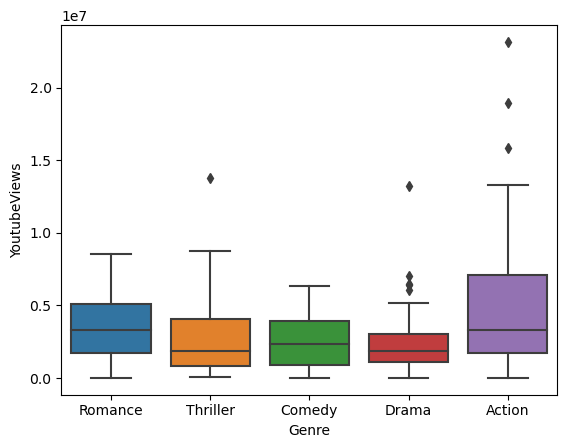

In [15]:
# 10. comparing Youtube views of genre by plotting boxplots
sns.boxplot(x='Genre', y='YoutubeViews', data=df)

As we can see, the Genre Action has the highest YouTube views.

## Q11. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated?
To solve Question 11, we use first calculate the correlation between the specified columns using the corr() function from the Pandas library, and then we plot a heatmap of the correlation vector using the heatmap() function from the Seaborn library.

<Axes: >

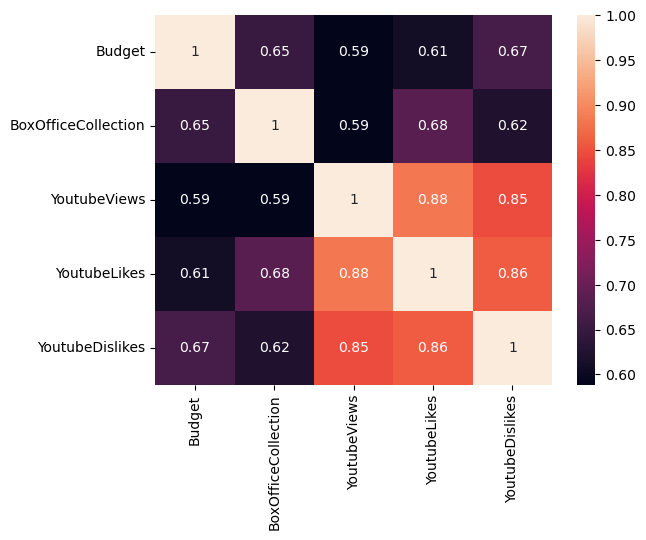

In [16]:
# 11. correlation heatmap for variables Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes

# calculating correlation values between the variables
corr = df[['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']].corr()

# plotting a heatmap to visualize the correlation
sns.heatmap(corr, annot=True)

As we can see, the columns YoutubeViews, YoutubeLikes, and YoutubeDislikes are highly correlated with each other.

## Q12. During 2013−2015 period, highlight the genre of movies and their box office collection? Visualize with best fit graph.
To solve Question 12, we use the barplot() function from the Seaborn library and pass the values Year to be plotted on the x-axis, BoxOfficeCollection to be plotted on the y-axis, and set the hue parameter to Genre to split the bars on the basis of Genre.

<Axes: xlabel='Year', ylabel='BoxOfficeCollection'>

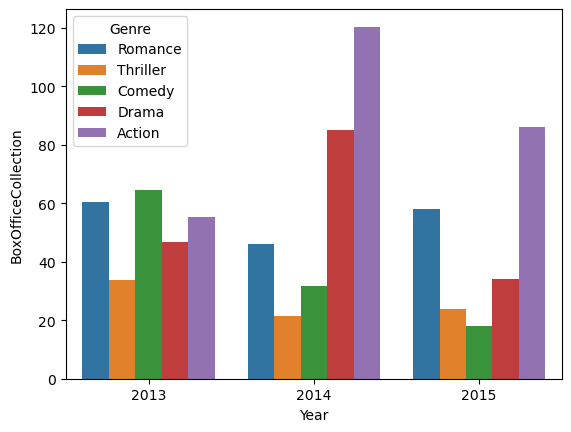

In [18]:
# 12. plotting a barplot to highlight the genre of movies and their box office collection
sns.barplot(x='Year', y='BoxOfficeCollection', hue='Genre', data=df, errorbar=None)

## Q13. During 2013−2015, find the number of movies released in every year. Also, visualize with best fit graph.
To solve Question 13, we first find the number of movies released every year using the value_counts() function from the Pandas library on the Year column.

In [20]:
# 13. finding number of movies released in every year
df.Year.value_counts()

2014    70
2013    67
2015    12
Name: Year, dtype: int64

Next, we use the countplot() function from the Seaborn library and pass the value Year to be plotted on the x-axis. The y-axis automatically plots the count of the discrete variable Year.

<Axes: xlabel='Year', ylabel='count'>

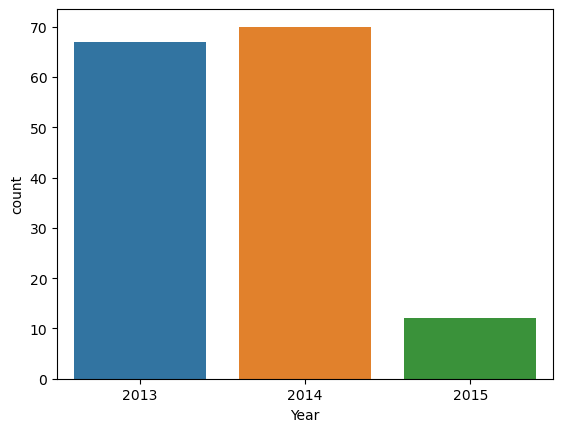

In [21]:
# 13. plotting a countplot to visualize the number of movies released every year
sns.countplot(x='Year', data=df)

As we can see, the year 2014 has the maximum number of movies closely followed by 2013.

## Q14. Find the distribution of movie budget for every Genre.
To solve Question 14, we use the distplot() function from the Seaborn library and pass the value Budget to be plotted on the x-axis and set the parameter kind to kde and hue to Genre to compare the Genres easily.

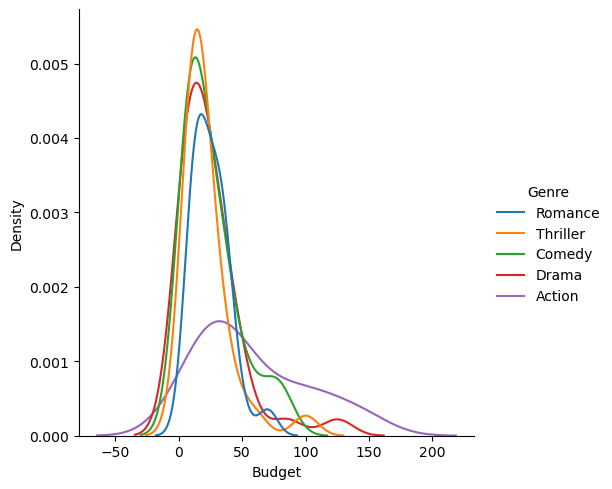

In [25]:
# 14. plotting a distplot to visualize the distribution of Budget Genre-wise
sns.displot(x='Budget', data=df, kind='kde', hue='Genre')


As we can see, almost all the Genres have right-skewed Budget.

## Q15. During 2013−2015, Visualize the number of YouTube likes and YouTube dislikes every year. Also, visualize with best fit graph.
To solve Question 15, we first find the sum of likes year-wise by grouping the dataframe by the Year column and summing over the YoutubeLikes column using the sum() function from the Pandas library.

In [26]:
# 15. finding number of YoutubeLikes every year
df.groupby(by='Year').YoutubeLikes.sum()

Year
2013    324180
2014    710142
2015    139431
Name: YoutubeLikes, dtype: int64

In [27]:
# 15. finding number of YoutubeDislikes every year
df.groupby(by='Year').YoutubeDislikes.sum()

Year
2013     58156
2014    104682
2015     17127
Name: YoutubeDislikes, dtype: int64

<Axes: >

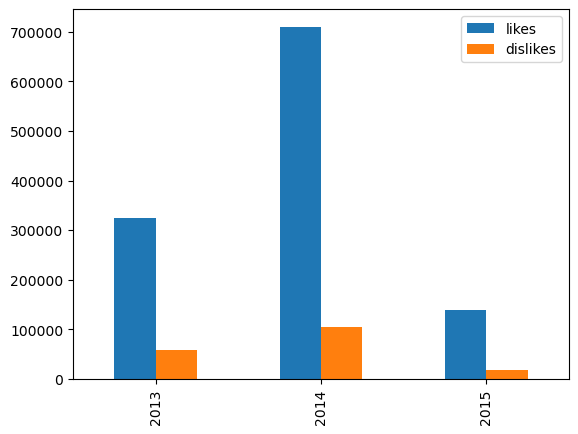

In [28]:
# listing the above results
likes =[324180, 710142, 139431]
dislikes=[58156, 104682, 17127]
year = ['2013', '2014', '2015']

# converting the results into a dataframe.
compare = pd.DataFrame ({'likes':likes, 'dislikes':dislikes}, index=year)

# 15. plotting the dataframe.
compare.plot.bar()